In [ ]:
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Cargar datos y normalizar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
usr_folder = r'/content/drive/MyDrive/Big Data/Datamining/Practica/2025_Datasets_Datamining' # Albert

In [ ]:
usr_folder = r'/content/drive/MyDrive/Master/Data Mining/Prácticas Data Mining/2025_Datasets_Datamining' # Wenjie#

In [ ]:
output_folder = usr_folder +  '/dataset_lite/Output'

In [ ]:
def to_float_list(value):
    # Se eliminan los corchetes "[" y "]" del principio y el final → usando strip("[]")
    # Se separan los números por el espacio en blanco →  usando split()
    # Se eliminan las comas sobrantes →  usando strip(',')
    # Se aplica la función float a cada elemento de la lista → usando map()
    return float(value.strip("[]").split()[0].strip(','))

# Se lee el CSV aplicando los conversores
df = pd.read_csv(output_folder + "/features_upsampling.csv")
df.tail()

,zcr_1,zcr_2,zcr_3,zcr_4,zcr_5,zcr_6,zcr_7,zcr_8,zcr_9,zcr_10,...,delta2_mfcc_13_165,delta2_mfcc_13_166,delta2_mfcc_13_167,delta2_mfcc_13_168,delta2_mfcc_13_169,delta2_mfcc_13_170,delta2_mfcc_13_171,delta2_mfcc_13_172,delta2_mfcc_13_173,ship
4347,0.007044,0.013484,0.015041,0.013324,0.020044,0.019173,0.026135,0.028262,0.029992,0.032342,...,-0.081803,-0.367965,-0.395403,-0.326765,0.138960,0.390437,0.469228,0.406062,0.146983,Tug
4348,0.130323,0.211049,0.287656,0.293977,0.280268,0.238891,0.187044,0.131666,0.088767,0.055389,...,-0.443518,-0.392126,0.044809,0.478780,0.768694,0.594729,0.066847,-0.336104,-0.464424,Tug
4349,0.000488,0.000554,0.000753,0.000331,0.000331,0.000264,0.000132,0.000264,0.000397,0.000463,...,0.505860,0.273407,-0.059955,0.213428,0.517738,0.297803,0.218956,0.240117,-0.059945,Tug
4350,0.012884,0.020781,0.029078,0.028389,0.029189,0.027290,0.027590,0.029889,0.031454,0.046836,...,0.744246,0.734697,0.151671,0.096206,-0.104409,-0.237571,-0.149374,0.137438,0.143293,Tug
4351,0.051367,0.084218,0.114570,0.127825,0.132565,0.139569,0.150019,0.160084,0.159530,0.155813,...,-0.224293,-0.255093,-0.131576,0.140877,0.525694,0.670380,0.624501,-0.015984,-0.437976,Tug


In [ ]:
## Normalizar los datos con RobustScaler
# Seleccionar solo las columnas numéricas
numerical_cols = df.select_dtypes(include=['number']).columns

# Inicializar y aplicar RobustScaler
scaler = RobustScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Separar los datos

In [ ]:
df["ship"].value_counts()

,count
ship,
Tug,1088
Tanker,1088
Passengership,1088
Cargo,1088


In [ ]:
## Separación el dataframe según las características "X" y el target "y".
X = df.drop(columns=["ship"]) # Se quita el target y las caracerísticas que no se tienen que analizar

# El target es adivinar el barco.
y = df["ship"]

# División estratificada para mantener la proporción de clases en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23, stratify=y)

# Verificar la proporción de clases en train y test
print("Proporción en train:")
print(y_train.value_counts(normalize=True))

print("Proporción en test:")
print(y_test.value_counts(normalize=True))

Proporción en train:
ship
Cargo            0.250164
Passengership    0.250164
Tug              0.249836
Tanker           0.249836
Name: proportion, dtype: float64
Proporción en test:
ship
Tanker           0.250383
Tug              0.250383
Cargo            0.249617
Passengership    0.249617
Name: proportion, dtype: float64


# Entrenamiento

In [ ]:
X_train = X_train.values
y_train = y_train.values

In [ ]:
RF = RandomForestClassifier(max_depth=20, n_estimators = 200, random_state=0)
RF.fit(X_train, y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Resultados

In [ ]:
# Accuracy
print("Accuracy - Datos de train: {} " .format(accuracy_score(y_train, y_train_pred)))
print("Accuracy - Datos de test: {} ". format(accuracy_score(y_test, y_test_pred)))

Accuracy - Datos de train: 1.0 
Accuracy - Datos de test: 0.8009188361408882 


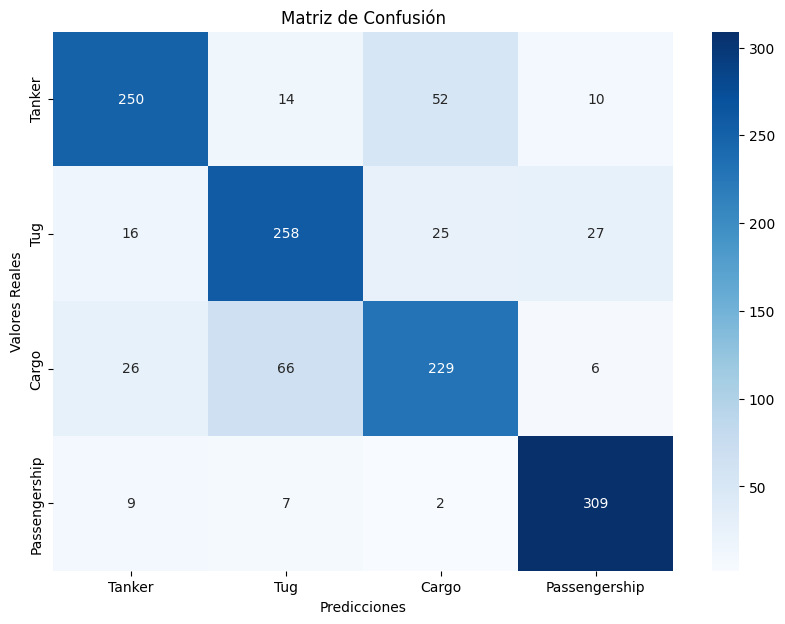

In [ ]:
# Crear la gráfica de la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
labels = y_test.unique()

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

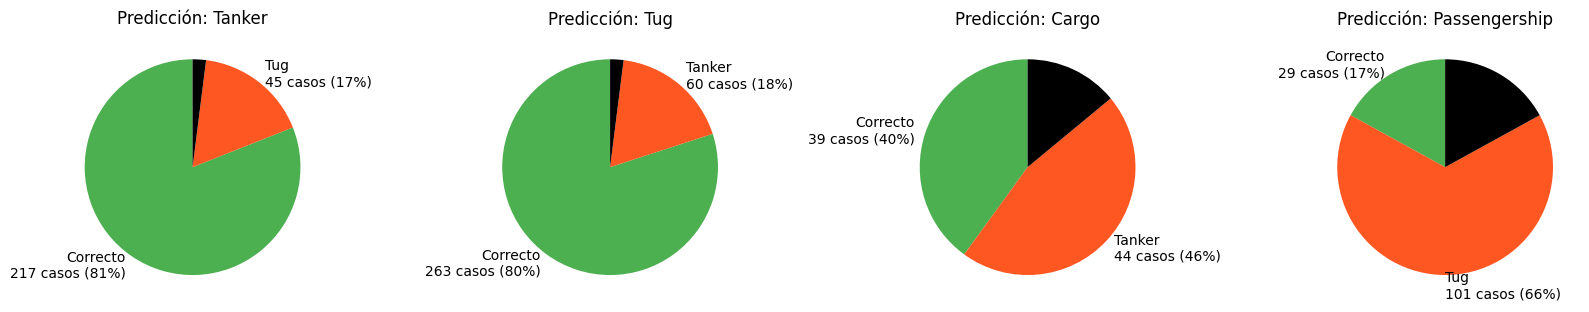

In [ ]:
data = {
    "Tanker": {"Correcto": (217, 81), "Tug": (45, 17)},
    "Tug": {"Correcto": (263, 80), "Tanker": (60, 18)},
    "Cargo": {"Correcto": (39, 40), "Tanker": (44, 46)},
    "Passengership": {"Correcto": (29, 17), "Tug": (101, 66)}
}

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for ax, (category, values) in zip(axes, data.items()):
    total = 100
    used_percentage = sum(val[1] for val in values.values())
    other_percentage = total - used_percentage

    labels = [f"{key}\n{val[0]} casos ({val[1]}%)" for key, val in values.items()]
    labels.append("")  # Empty label for the black segment

    sizes = [val[1] for val in values.values()]
    sizes.append(other_percentage)

    colors = ["#4CAF50", "#FF5722", "black"]

    ax.pie(sizes, labels=labels, autopct="", startangle=90, colors=colors)
    ax.set_title(f"Predicción: {category}")

plt.tight_layout()
plt.show()

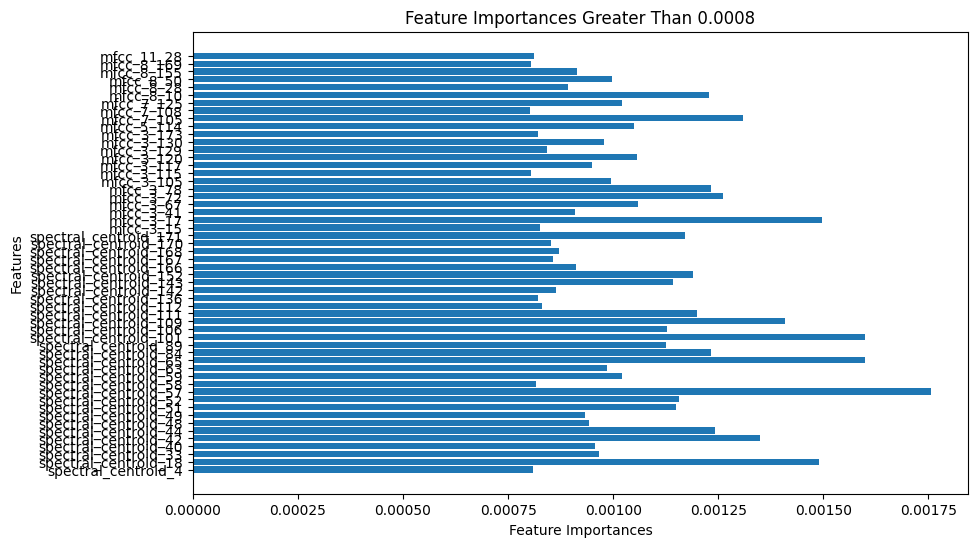

In [ ]:
# Obtener las importancias de las características
importances = RF.feature_importances_

# Filtrar las características con una importancia mayor a 0.0008
filtered_indices = [i for i, imp in enumerate(importances) if imp > 0.0008]

# Crear las listas de características y sus importancias filtradas
filtered_features = [X.columns[i] for i in filtered_indices]
filtered_importances = [importances[i] for i in filtered_indices]

# Graficar solo las características filtradas
plt.figure(figsize=(10, 6))
plt.barh(filtered_features, filtered_importances)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.title("Feature Importances Greater Than 0.0008")
plt.show()


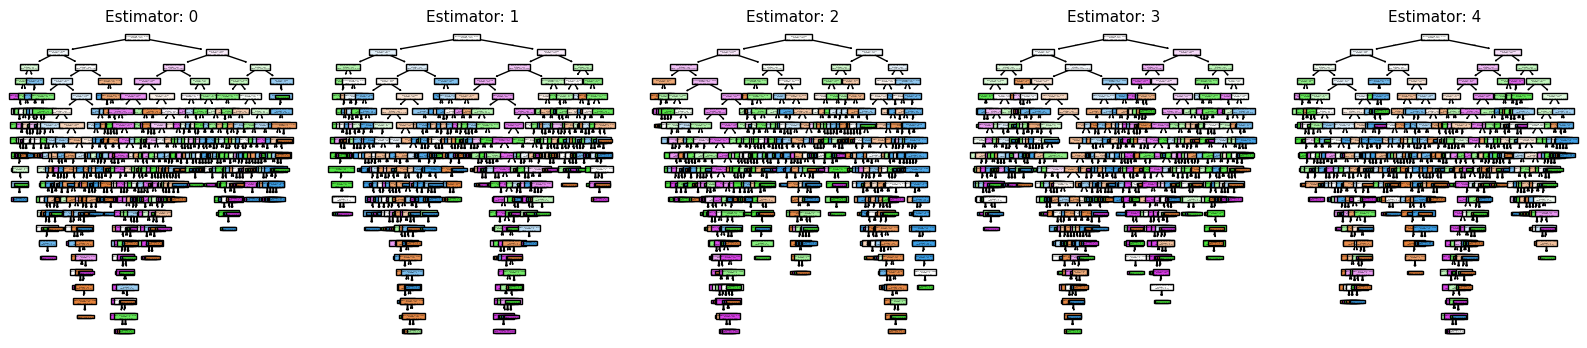

In [ ]:
# Gráfica de los árboles
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (20,4))
for index in range(0, 5):
    tree.plot_tree(RF.estimators_[index],
                   feature_names = X.columns,
                   filled = True,
                   impurity=False,
                   ax = axes[index]);


    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

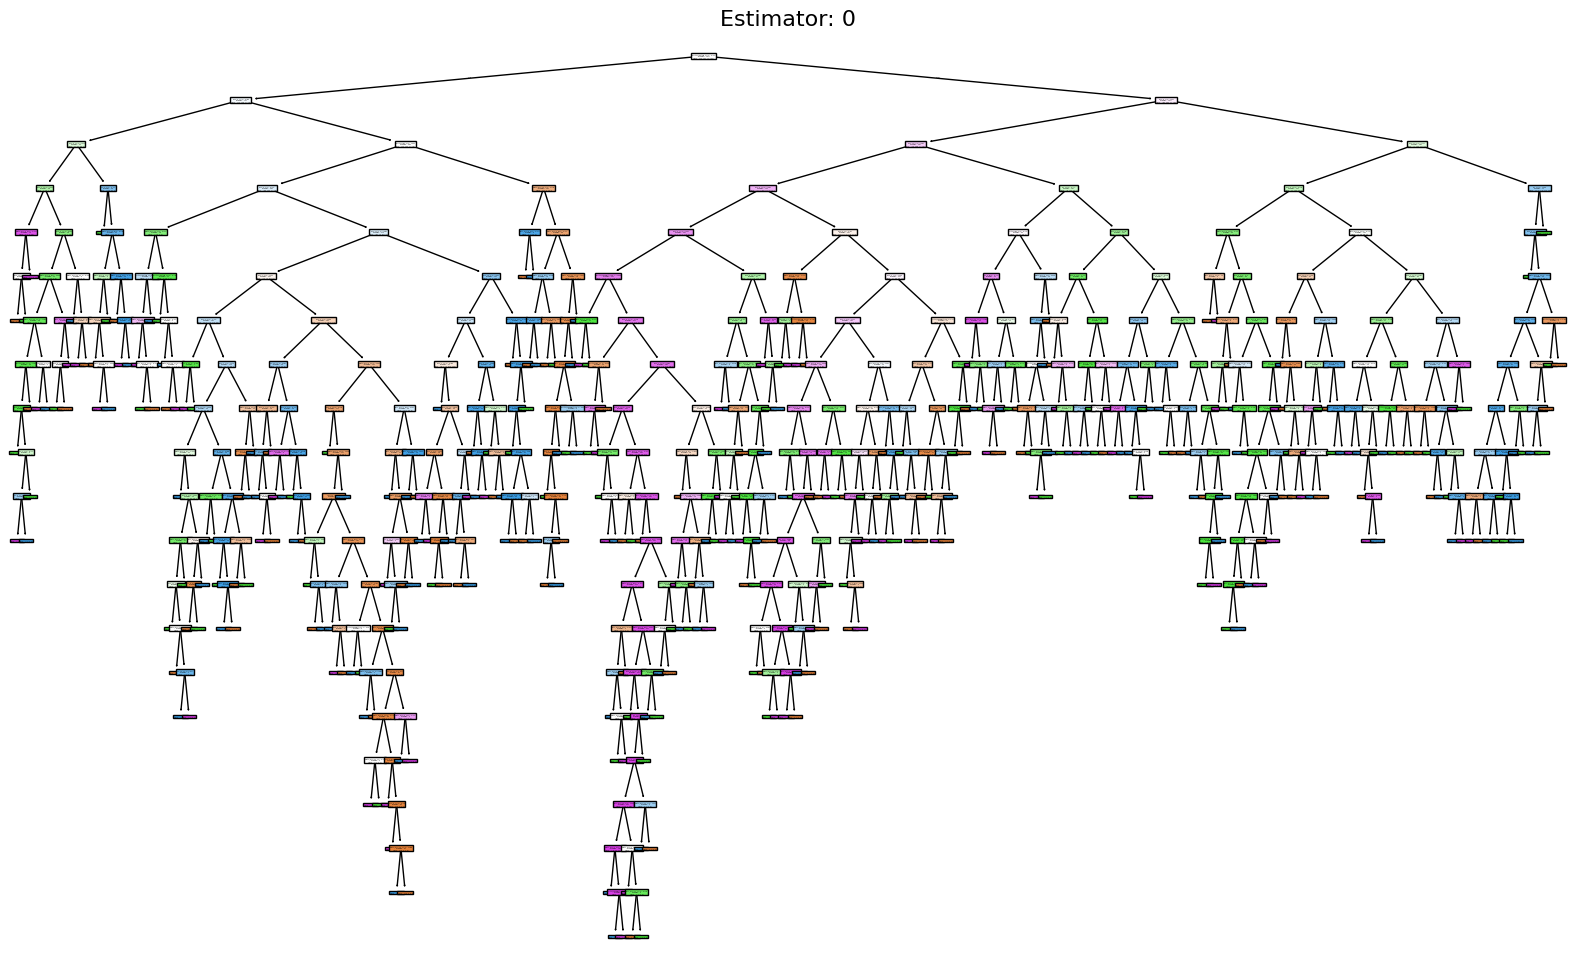

In [ ]:
# Seleccionar un solo árbol para mostrar
fig, ax = plt.subplots(figsize=(20, 12))  # Aumentar el tamaño de la figura
tree.plot_tree(RF.estimators_[0],  # Solo mostrar el primer estimador
               feature_names=X.columns,
               filled=True,
               impurity=False,
               ax=ax)

ax.set_title('Estimator: 0', fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Obtener los resultados de precisión, recall y f1-score
report = classification_report(y_test, y_test_pred)

# Mostrar el reporte
print(report)

               precision    recall  f1-score   support

        Cargo       0.83      0.77      0.80       326
Passengership       0.75      0.79      0.77       326
       Tanker       0.74      0.70      0.72       327
          Tug       0.88      0.94      0.91       327

     accuracy                           0.80      1306
    macro avg       0.80      0.80      0.80      1306
 weighted avg       0.80      0.80      0.80      1306



# Pruebas con distintos hiperparámetros

In [ ]:
param_grid = {
    'max_depth': [10, 20, 30, None],
    'n_estimators': [50, 100, 200, 300]}

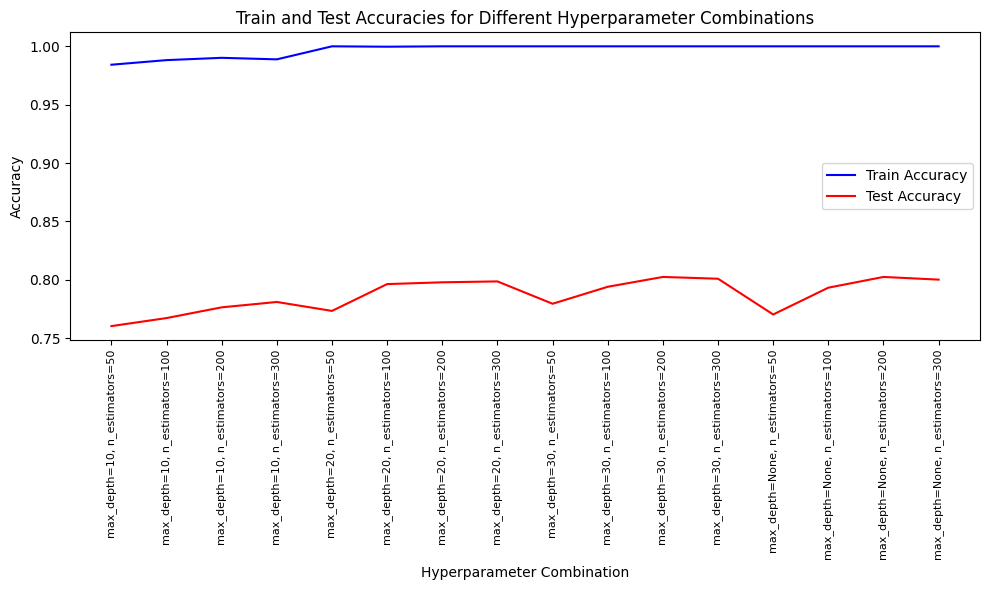

In [ ]:
# Crear listas para almacenar las accuracies
train_accuracies = []
test_accuracies = []
param_combinations = []  # Lista para almacenar las combinaciones de parámetros

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

# Realizar un bucle sobre todas las combinaciones de los parámetros
for max_depth in param_grid['max_depth']:
    for n_estimators in param_grid['n_estimators']:
        # Crear el modelo con los parámetros actuales
        RF = RandomForestClassifier(
            max_depth=max_depth,
            n_estimators=n_estimators,
            random_state=23
        )

        # Entrenar el modelo
        RF.fit(X_train, y_train)

        # Predecir
        y_train_pred = RF.predict(X_train)
        y_test_pred = RF.predict(X_test)

        # Calcular las accuracies
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Almacenar las accuracies
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # Almacenar la combinación de parámetros
        param_combinations.append(f"max_depth={max_depth}, n_estimators={n_estimators}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_accuracies)), train_accuracies, label="Train Accuracy", color='blue')
plt.plot(range(len(test_accuracies)), test_accuracies, label="Test Accuracy", color='red')
plt.xticks(ticks=range(len(param_combinations)), labels=param_combinations, rotation=90, fontsize=8)
plt.xlabel("Hyperparameter Combination")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Train and Test Accuracies for Different Hyperparameter Combinations")
plt.tight_layout()  # Ajustar el diseño para evitar solapamiento de etiquetas
plt.show()

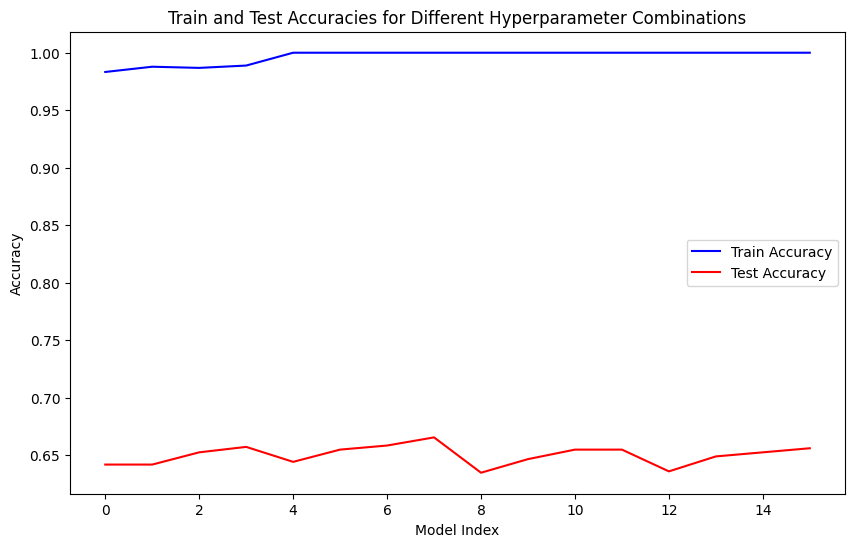

In [ ]:
# Crear listas para almacenar las accuracies
train_accuracies = []
test_accuracies = []

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

# Realizar un bucle sobre todas las combinaciones de los parámetros
for max_depth in param_grid['max_depth']:
    for n_estimators in param_grid['n_estimators']:
      # Crear el modelo con los parámetros actuales
      RF = RandomForestClassifier(
          max_depth=max_depth,
          n_estimators=n_estimators,
          random_state=23
      )

      # Entrenar el modelo
      RF.fit(X_train, y_train)

      # Predecir
      y_train_pred = RF.predict(X_train)
      y_test_pred = RF.predict(X_test)

      # Calcular las accuracies
      train_accuracy = accuracy_score(y_train, y_train_pred)
      test_accuracy = accuracy_score(y_test, y_test_pred)

      # Almacenar las accuracies
      train_accuracies.append(train_accuracy)
      test_accuracies.append(test_accuracy)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_accuracies)), train_accuracies, label="Train Accuracy", color='blue')
plt.plot(range(len(test_accuracies)), test_accuracies, label="Test Accuracy", color='red')
plt.xlabel("Model Index")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Train and Test Accuracies for Different Hyperparameter Combinations")
plt.show()

# Save model

In [25]:
import pickle

model_folder = usr_folder +  '/dataset_lite/Modelos'
# save
with open(model_folder+'/model_RF_Upsampling.pkl','wb') as f:
    pickle.dump(RF,f)
